# California Housing Price Prediction

In this simple project, we are going to do some visualization for the California housing price, and try to predict the future california median house price by using linear regression algorithm. The data is based on California Census in 1990.

<font size="5">Step1: Import package and load data </font>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
data=pd.read_csv('cal_housing.data',header=None)
data.columns = ['longitude','latitude',
                'housingMedianAge','totalRooms', 
                'totalBedrooms',
                'population','households',
                'medianIncome','medianHouseValue']

In [6]:
data.head()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [7]:
data.describe()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
data.isnull().sum()

longitude           0
latitude            0
housingMedianAge    0
totalRooms          0
totalBedrooms       0
population          0
households          0
medianIncome        0
medianHouseValue    0
dtype: int64

<font size="5">Step2: Next we are going to do some data visulization and see if we can find something interesting.</font>
    

<font size="3">Colormap</font>

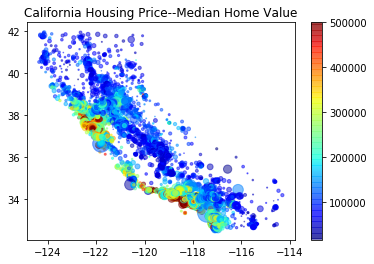

In [11]:
plt.scatter(data['longitude'], data['latitude'],s=data['population']/100,
            alpha=0.5,c=data['medianHouseValue'],cmap=plt.get_cmap('jet'))
plt.title('California Housing Price--Median Home Value')
plt.colorbar()
plt.show()

<font size="3">Histogram of density distribution</font>

/Users/linjin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/linjin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/linjin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/linjin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


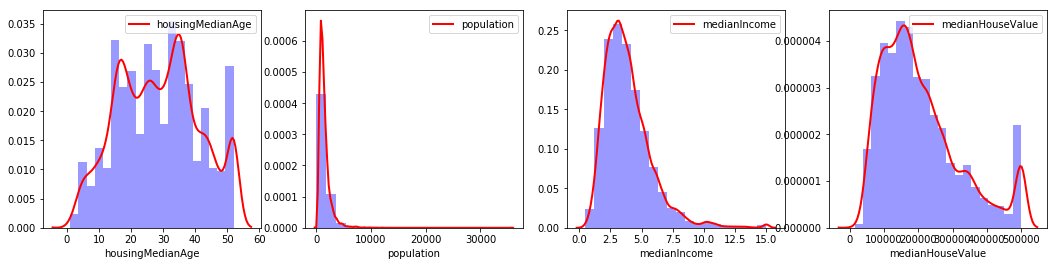

In [15]:
feature = ['housingMedianAge', 'population', 'medianIncome', 'medianHouseValue']
index = 0
plt.figure(figsize=(18,4))
for fea in feature:
    index += 1
    plt.subplot(1,4,index)
    plt.xlabel(fea)
    sns.distplot(data[fea], kde=True,bins=20,color='b',kde_kws={"color": "r", "lw": 2, "label": fea})

<font size="3">Scatter plot--features against target</font>

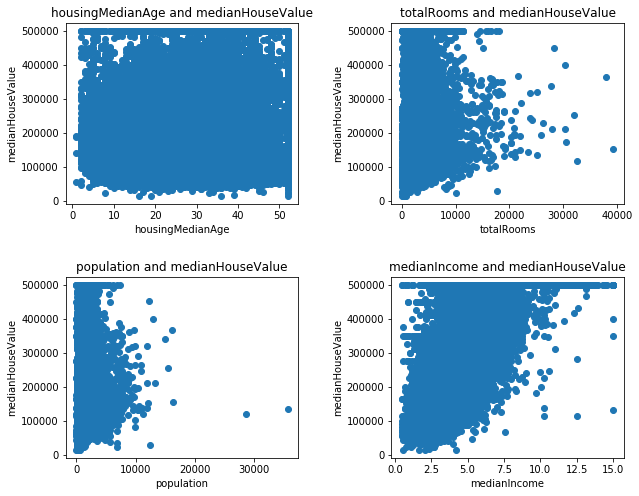

In [16]:
feature = ['housingMedianAge','totalRooms','population','medianIncome',]
fig,axes = plt.subplots(2, 2, figsize=(10,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
for i in range(4):
    row, col = i // 2, i % 2
    axes[row][col].scatter(data[feature[i]],data['medianHouseValue'])
    axes[row][col].set_title(feature[i] + ' and medianHouseValue')
    axes[row][col].set_xlabel(feature[i])        
    axes[row][col].set_ylabel('medianHouseValue')
plt.show()

<font size="3"> Heatmap--correlation among features </font>

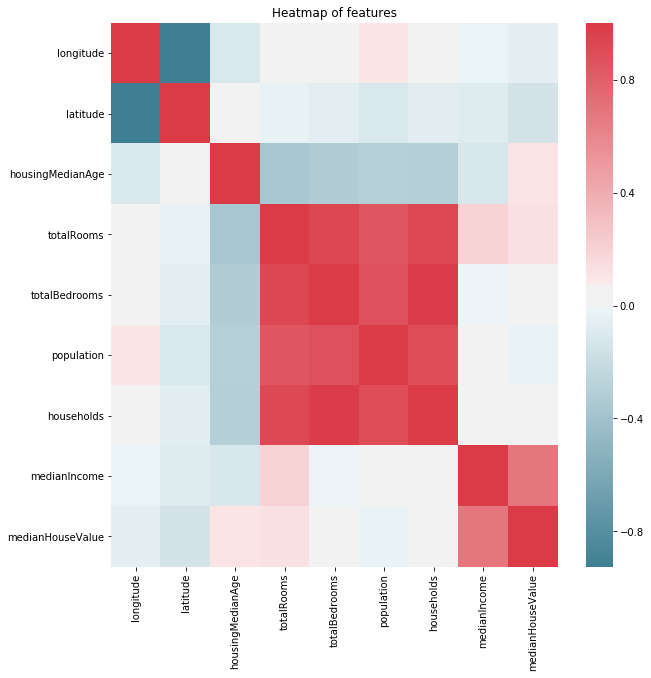

In [18]:
plt.subplots(figsize=(10,10))
plt.title("Heatmap of features",fontsize=12)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data.corr(), cmap=cmap)
plt.show()

<font size="5">Step3: Feature Engineering & Model Building</font>

<font size="3">Training testing splitting & validation set</font>

In [21]:
n_sample = len(data) #20640
print(n_sample)

20640


In [22]:
features = data.drop(['medianHouseValue'],1)
prospects_df = features[-1000:] ## test data manual set X_test
features = features[0:n_sample-1000] ## training dataset features X_train
target = data['medianHouseValue']/10000
prospects_lbl = target[-1000:] ## y_test
target = target[0:n_sample-1000] ## y_train

<font size="3">Linear Regression</font>

In [24]:
model_LR = LinearRegression()
model_LR.fit(features, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
model_LR.coef_

array([-4.25226958e+00, -4.23820933e+00,  1.17741493e-01, -8.44097408e-04,
        1.12142457e-02, -3.90421870e-03,  5.24112125e-03,  4.04697382e+00])

In [26]:
model_LR.intercept_

-356.6029888301955

<font size="3">Make Predictions</font>

In [27]:
y_true = prospects_lbl
y_hat = model_LR.predict(prospects_df) ##y_hat = h(theta, X_test)

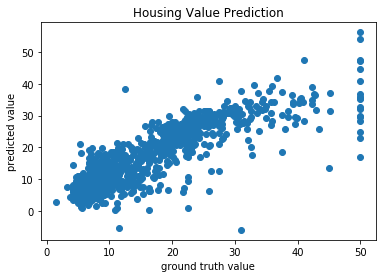

In [28]:
plt.plot(y_true, y_hat, 'o')
plt.title('Housing Value Prediction')
plt.xlabel('ground truth value')
plt.ylabel('predicted value')
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('RMSE:'+str(np.sqrt(mean_squared_error(y_true,y_hat))))
print('R2:'+str(r2_score(y_true,y_hat)))

RMSE:5.502031204687733
R2:0.7051413776490941
